# Задание
Выполните задания, используя jupyter.

### Задания для итоговой аттестации

<div class="alert alert-info">
Вы выбрали Dataset из списка, проведите полный цикл работы над вашим проектом, что проходили ранее. Pipeline выполнения задачи:

1. Загрузка и предобработка данных

2. Описательный анализ данных, просмотр данных и вывод статистики

3. Постройте необходимые графики для анализа

4. Проверьте гипотезы (если потребуется)

5. Сделайте промежуточный отчет-вывод по исследованию

6. Определите, какую задачу вы будете решать (классификация, регрессия и т.д.)

7. Создайте несколько моделей для прогнозирования вашего целевого признака и выберите наилучшую, опираясь на вашу валидацию

8. Сделайте прогноз для тестовой выборки (должно быть три выборки в этой задаче: тренировочная, валидационная, тестовая)

9. Приведите метрику, с помощью которой вы будете оценивать работу вашей модели (обоснуйте ваш выбор метрики)

10. Сделайте вывод о работе вашей модели и метриках. Обоснуйте: «Нужно ли использовать для решения этой задачи машинное обучение или можно обойтись dummy-предсказанием?»

Рекомендации:

> Соблюдайте PEP8

> Комментируйте код в местах, где конструкция большая

> Оставляйте промежуточные выводы по вашему исследованию и построению модели (так кураторам будет проще понять ваши заключения)

> Экспериментируйте! Вы не ограничены в моделях и подходах. Можете использовать любые DS инструменты (и те, которые мы не разбирали с вами на курсе)

<div style='border:solid blue 2px; padding: 20px'>
    
# Об этом наборе данных
    
В этом датасете собрана полная информация обо всех новейших смартфонах, доступных на рынке по состоянию на текущий момент времени.
Данный датасет был создан с помощью веб-скраппинга интернет-ресурсов с целью сбора точной и актуальной информации о различных моделях смартфонов, их технических характеристиках, возможностях и ценах.


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

from xgboost import XGBRegressor

from IPython.display import Image
from IPython.core.display import HTML 

import warnings
warnings.filterwarnings("ignore")

In [2]:
Image(url="https://xchip.ru/wp-content/uploads/2020/12/smart-1.jpg")

<div class="alert alert-info">

> 1. Загрузка и предобработка данных

> 2. Описательный анализ данных, просмотр данных и вывод статистики

> 3. Постройте необходимые графики для анализа

> 4. Проверьте гипотезы (если потребуется)

> 5. Сделайте промежуточный отчет-вывод по исследованию

In [3]:
df = pd.read_csv('./smartphones.csv')

In [4]:
df.shape

(980, 22)

In [5]:
df.sample(5)

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
579,samsung,Samsung Galaxy A21s (6GB RAM + 128GB),17499,7.5,0,exynos,8.0,2.0,5000.0,0,...,128,6.50,60,4,android,48.0,13.0,1,1600,720
584,samsung,Samsung Galaxy A23 5G,22999,7.9,1,snapdragon,8.0,2.2,5000.0,1,...,128,6.60,120,4,android,50.0,8.0,1,2408,1080
484,realme,Realme 9 Pro Plus 5G (8GB RAM + 256GB),24494,8.2,1,dimensity,8.0,2.5,4500.0,1,...,256,6.40,90,3,android,50.0,16.0,0,2400,1080
334,oppo,OPPO A54 (4GB RAM + 128GB),11990,7.1,0,helio,8.0,2.3,5000.0,1,...,128,6.51,60,3,android,13.0,16.0,1,720,1600
717,tecno,Tecno Pova Neo 2,13990,6.7,0,helio,8.0,2.0,7000.0,0,...,128,6.82,90,2,android,16.0,8.0,1,1600,720


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

In [7]:
df.isna().sum()

brand_name                     0
model                          0
price                          0
avg_rating                   101
5G_or_not                      0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
resolution_height              0
resolution_width               0
dtype: int64

<div class="alert alert-warning">
Имеются пропуски

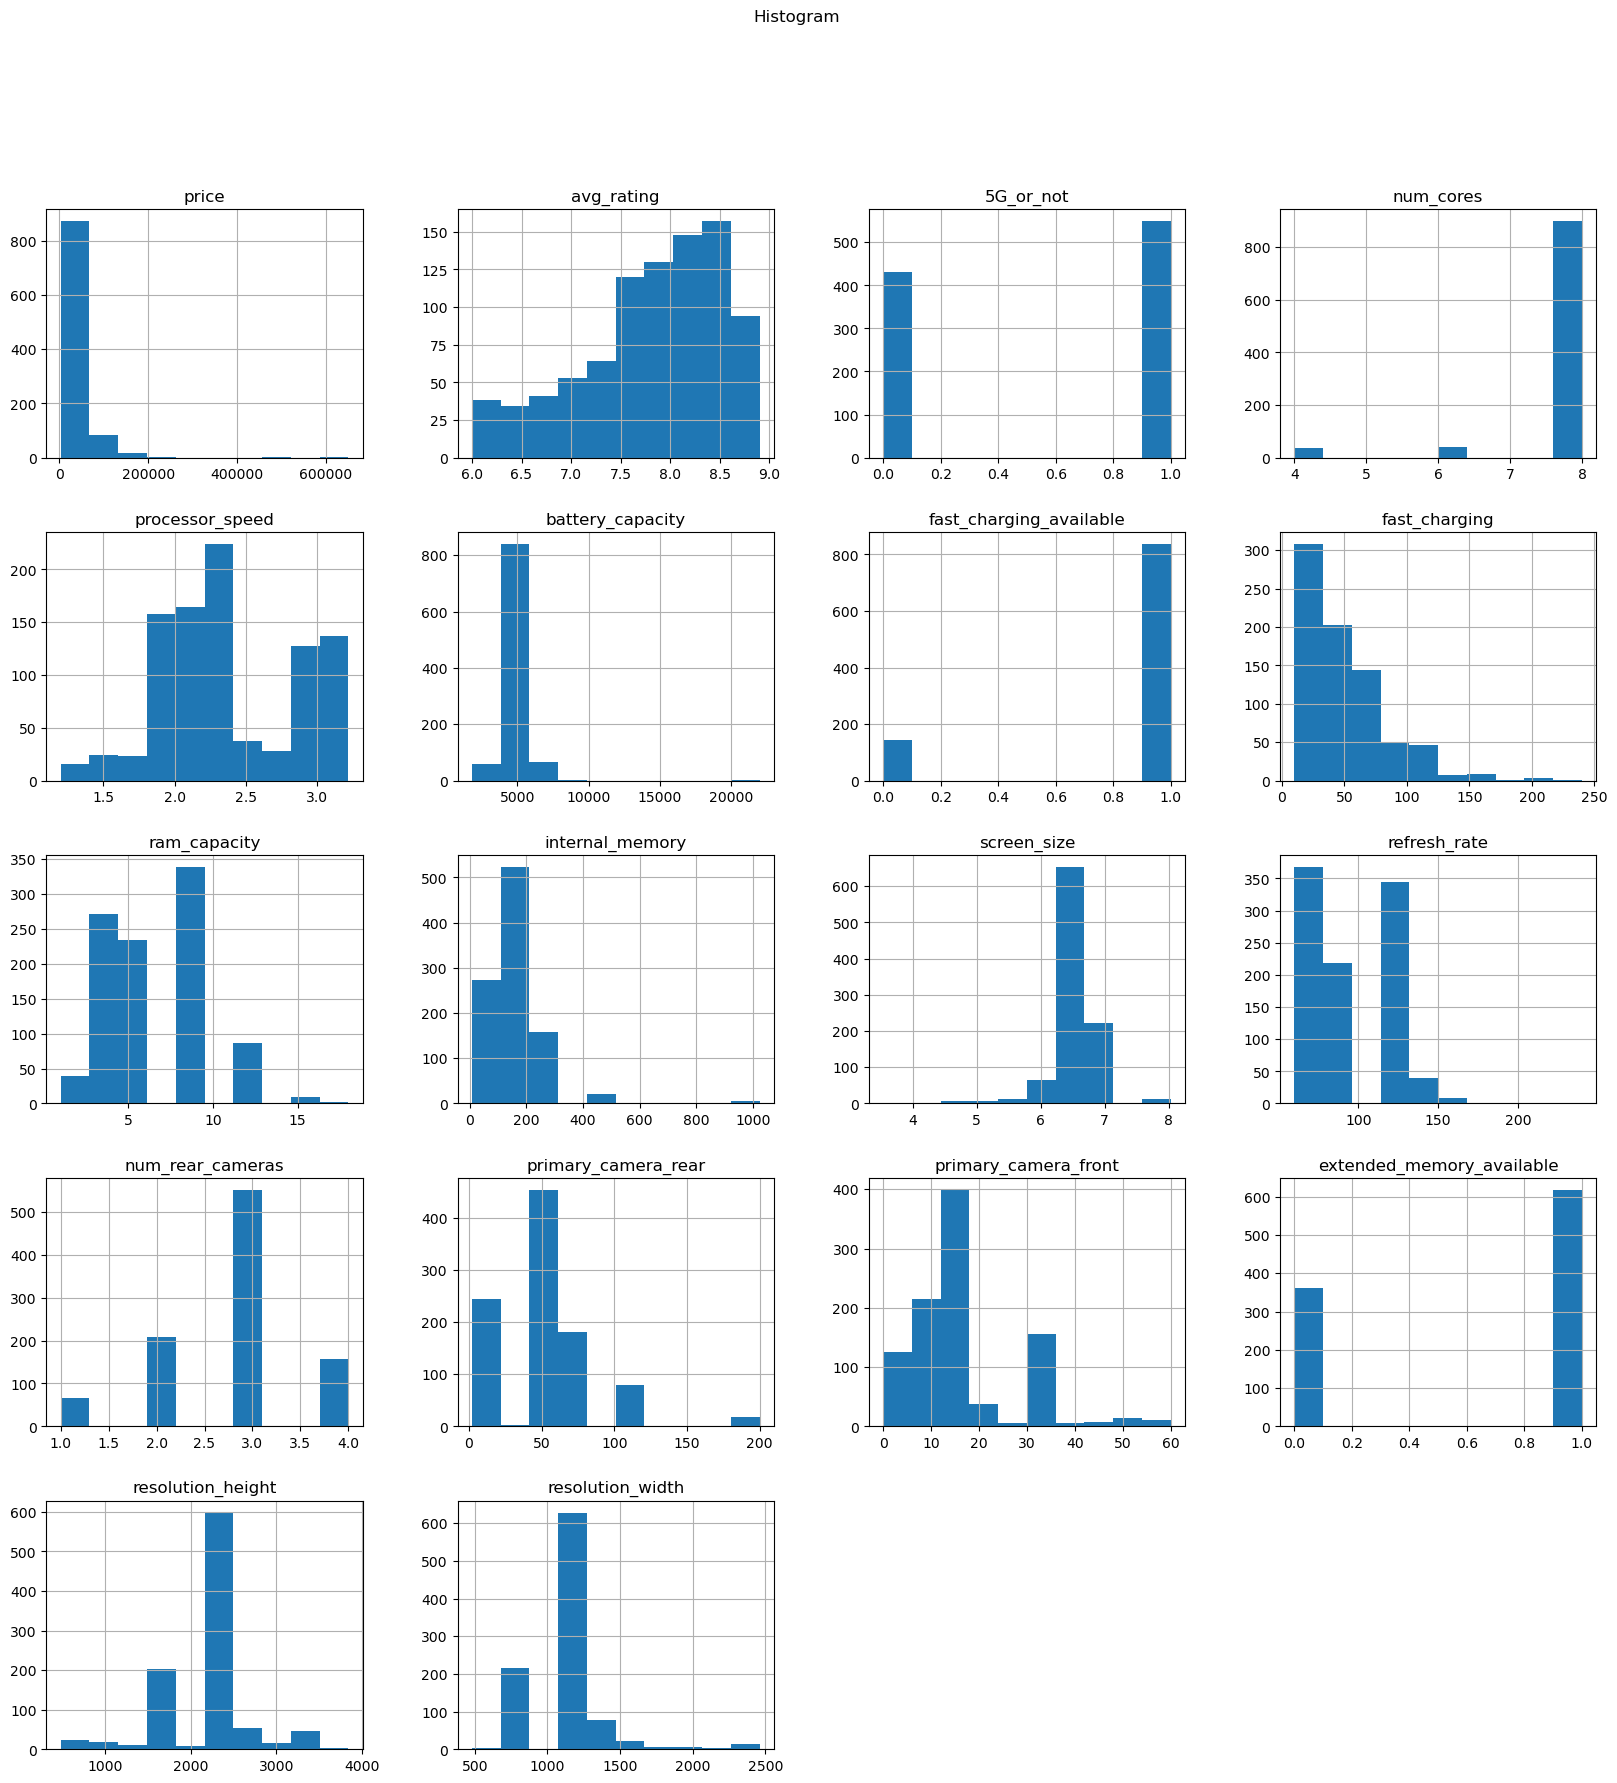

In [8]:
df.hist(figsize=(20, 20))
plt.suptitle('Histogram')
plt.show()

<div class="alert alert-warning">
Намеки на нормальное распределение отсутсвуют

<div style='border:solid blue 2px; padding: 20px'>

Перед обучением модели необходимо выполнить следующие шаги с данными:

1. Предобработка данных: Это включает в себя удаление выбросов, заполнение пропущенных значений, нормализацию или стандартизацию данных и преобразование категориальных переменных в числовые.

2. Разделение данных на обучающую, проверочную и тестовую выборки: Это позволяет оценить производительность модели на независимых данных и избежать переобучения. Обычно данные разделяют в соотношении 70-80% для обучения, 10-15% для проверки и 10-15% для тестирования.

3. Преобразование данных в формат, пригодный для обучения: Данные должны быть представлены в виде числовых массивов или тензоров, чтобы их можно было использовать для обучения модели.

4. Балансировка классов (при необходимости): Если классы в данных несбалансированы (например, один класс имеет гораздо больше примеров, чем другой), то можно применить методы для балансировки классов, такие как undersampling (уменьшение примеров преобладающего класса) или oversampling (увеличение примеров меньшего класса).

5. Проверка качества данных: Перед обучением модели следует проверить качество данных, чтобы убедиться, что они достаточно хороши для обучения. Это может включать в себя проверку наличия ошибок или аномалий в данных.

6. Предварительное обучение (при необходимости): В некоторых случаях может быть полезно предварительно обучить модель на большом объеме данных, а затем дообучить ее на более узкой задаче или на более ограниченном наборе данных.

7. Подготовка данных для загрузки в модель: Наконец, данные должны быть подготовлены для загрузки в модель, что может включать в себя создание итераторов или генераторов для эффективной загрузки данных в память модели по мере необходимости. 

**Проведем ускоренный EDA**

In [9]:
report = sv.analyze(df)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<div class="alert alert-success">
    
**Выводы:**

* Меньше двух процентов всех телефонов обладают 4х или 6ти ядерным процессором
    
* Самый брендовый процессор - snapdragon
    
* 56 % телефонов обладают возможностью подключения 5G
    
* Наиболее популярный объем памяти - 128 ГБ
    
* Samsung и Xiaomi соперничиют по популярности
    
* Большиство имеют функцию "Быстрой зарядки"
    
* Около половины телефонов отсутствуют возможность добавить память

* Рейтинг напрямую зависит от скорости процесосра

<Axes: >

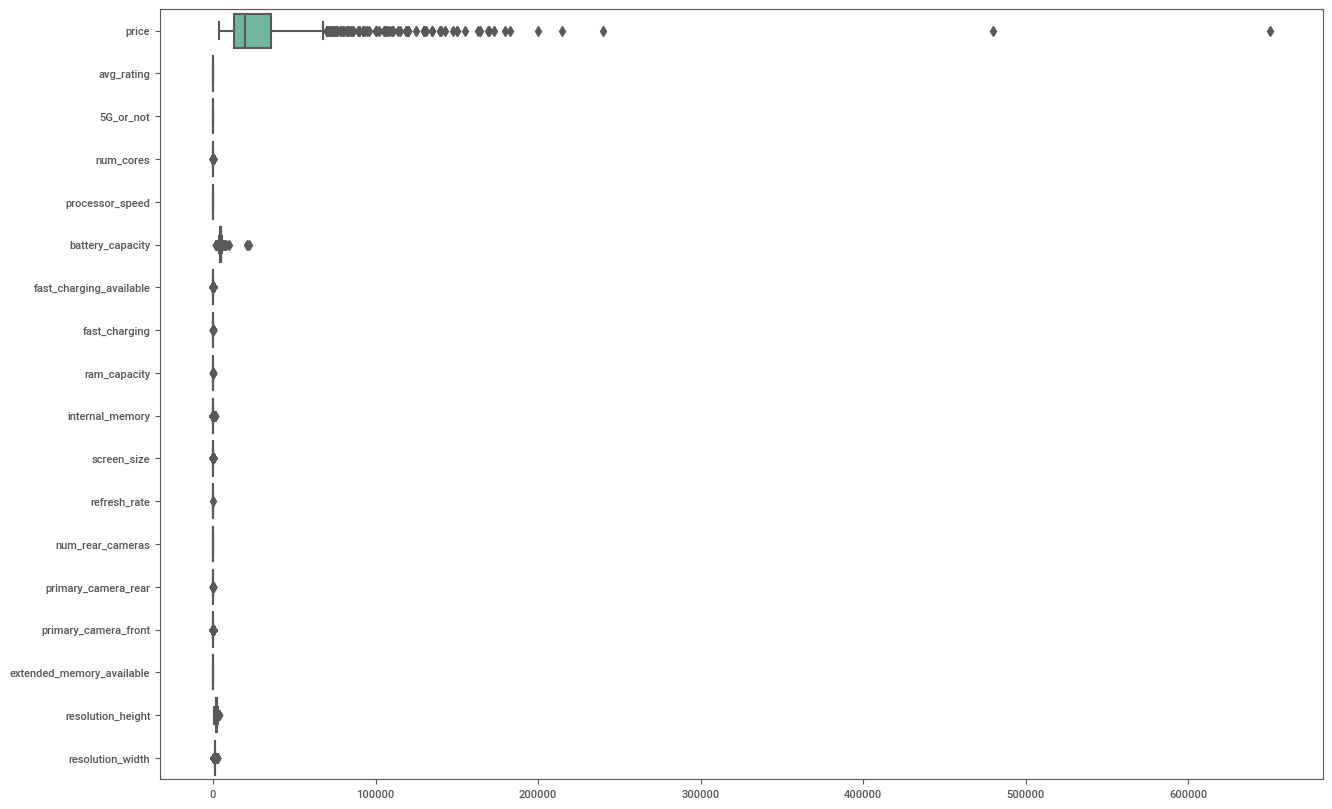

In [10]:
plt.figure(figsize=(15, 10))
sns.boxplot(df, orient="h", palette="Set2")

<div class="alert alert-info">
Телефоны в наше время дорогие!!!

In [11]:
le = LabelEncoder()

In [12]:
# преобразуем столбецы
df['brand_name'] = le.fit_transform(df['brand_name'])
df['model'] = le.fit_transform(df['model'])
df['processor_brand'] = le.fit_transform(df['processor_brand'])
df['os'] = le.fit_transform(df['os'])

In [13]:
df

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,0,0,38999,7.3,0,0,6.0,2.65,3110.0,0,...,64,6.10,60,2,1,12.0,12.0,0,1792,828
1,0,1,46999,7.5,0,0,6.0,2.65,3110.0,0,...,128,6.10,60,2,1,12.0,12.0,0,1792,828
2,0,2,109900,7.7,0,0,6.0,2.65,3500.0,1,...,64,6.50,60,3,1,12.0,12.0,0,2688,1242
3,0,3,51999,7.4,1,0,6.0,3.10,NaN,0,...,64,6.10,60,2,1,12.0,12.0,0,2532,1170
4,0,4,55999,7.5,1,0,6.0,3.10,NaN,0,...,128,6.10,60,2,1,12.0,12.0,0,2532,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,44,932,13999,7.5,0,9,8.0,2.30,5020.0,1,...,64,6.67,60,4,0,48.0,16.0,1,2400,1080
976,44,933,14439,7.7,0,9,8.0,2.30,5020.0,1,...,128,6.67,60,4,0,48.0,16.0,1,2400,1080
977,44,934,16490,8.0,0,9,8.0,2.30,5020.0,1,...,64,6.67,60,4,0,64.0,32.0,1,2400,1080
978,45,935,19999,8.2,1,9,8.0,3.20,4200.0,1,...,128,6.90,120,4,0,50.0,16.0,1,2460,1080


In [14]:
df.isna().sum()

brand_name                     0
model                          0
price                          0
avg_rating                   101
5G_or_not                      0
processor_brand                0
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
os                             0
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
resolution_height              0
resolution_width               0
dtype: int64

In [15]:
df.describe()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
count,980.000000,980.000000,980.000000,879.000000,980.000000,980.000000,974.000000,938.000000,969.000000,980.000000,...,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,975.000000,980.000000,980.000000,980.000000
mean,30.481633,489.500000,32520.504082,7.825825,0.560204,6.101020,7.772074,2.427217,4817.748194,0.854082,...,141.036735,6.536765,92.256122,2.814286,0.112245,50.319286,16.589744,0.630612,2214.663265,1075.852041
std,12.368643,283.045933,39531.812669,0.740285,0.496616,3.697858,0.836845,0.464090,1009.540054,0.353205,...,107.134516,0.349162,28.988052,0.776441,0.456094,33.000968,10.876944,0.482885,516.484254,290.164931
min,0.000000,0.000000,3499.000000,6.000000,0.000000,0.000000,4.000000,1.200000,1821.000000,0.000000,...,8.000000,3.540000,60.000000,1.000000,0.000000,2.000000,0.000000,0.000000,480.000000,480.000000
25%,25.000000,244.750000,12999.000000,7.400000,0.000000,2.000000,8.000000,2.050000,4500.000000,1.000000,...,64.000000,6.500000,60.000000,2.000000,0.000000,24.000000,8.000000,0.000000,1612.000000,1080.000000
50%,33.000000,489.500000,19994.500000,8.000000,1.000000,6.500000,8.000000,2.300000,5000.000000,1.000000,...,128.000000,6.580000,90.000000,3.000000,0.000000,50.000000,16.000000,1.000000,2400.000000,1080.000000
75%,43.000000,734.250000,35491.500000,8.400000,1.000000,9.000000,8.000000,2.840000,5000.000000,1.000000,...,128.000000,6.670000,120.000000,3.000000,0.000000,64.000000,16.000000,1.000000,2408.000000,1080.000000
max,45.000000,979.000000,650000.000000,8.900000,1.000000,13.000000,8.000000,3.220000,22000.000000,1.000000,...,1024.000000,8.030000,240.000000,4.000000,3.000000,200.000000,60.000000,1.000000,3840.000000,2460.000000


**Руководствуемся следующей логикей:**

    Если среднее заметно больше станд отклонения, то будет заполнен пропуск средним, в противном случае медианой

In [16]:
mean_ratings = df.groupby('brand_name')['avg_rating'].transform('mean')
df['avg_rating'] = df['avg_rating'].fillna(mean_ratings)

Давайте выполним несколько приложений, чтобы лучше классифицировать данные и предотвратить переобучение.

In [17]:
def format_resolution(row):
    height = row['resolution_height']
    width = row['resolution_width']
    return f"{height}x{width}"
df['resolution'] = df.apply(format_resolution, axis=1)

In [18]:
resolutions = ['2400x1080', '1600x720', '2408x1080', '2412x1080']
resdum = df['resolution'].isin(resolutions)
resdum_df = df[resdum]
resolution_dummies = pd.get_dummies(resdum_df['resolution'], prefix='resolution')
resolution_dummies = resolution_dummies.astype(int)
processor_brands = ['snapdragon', 'dimensity', 'helio', 'bionic']
procdum = df['processor_brand'].isin(processor_brands)
filtered_df = df[procdum]
processor_dummies = pd.get_dummies(filtered_df['processor_brand'], prefix='processor')
processor_dummies = processor_dummies.astype(int)
internal_memory = [128, 256, 64]
imdum = df['internal_memory'].isin(internal_memory)
imdum_df = df[imdum]
internal_memory_dummies = pd.get_dummies(imdum_df['internal_memory'], prefix='internal_memory')
internal_memory_dummies = internal_memory_dummies.astype(int)
num_cores = [8.0]
ncdum = df['num_cores'].isin(num_cores)
ncdum_df = df[ncdum]
num_cores_dummies = pd.get_dummies(ncdum_df['num_cores'], prefix='num_cores')
num_cores_dummies = num_cores_dummies.astype(int)
ram_capacity = [8, 6, 4]
rcdum = df['ram_capacity'].isin(ram_capacity)
rcdum_df = df[rcdum]
ram_capacity_dummies = pd.get_dummies(rcdum_df['ram_capacity'], prefix='ram_capacity')
ram_capacity_dummies = ram_capacity_dummies.astype(int)
primary_camera_front = [16.0, 8.0, 32.0]
pcfdum = df['primary_camera_front'].isin(primary_camera_front)
pcfdum_df = df[pcfdum]
primary_camera_front = pd.get_dummies(pcfdum_df['primary_camera_front'], prefix='primary_camera_front')
primary_camera_front_dummies = primary_camera_front.astype(int)
primary_camera_rear = [50.0, 64.0, 48.0, 108.0]
pcrdum = df['primary_camera_rear'].isin(primary_camera_rear)
pcrdum_df = df[pcrdum]
primary_camera_rear = pd.get_dummies(pcrdum_df['primary_camera_rear'], prefix='primary_camera_rear')
primary_camera_rear_dummies = primary_camera_rear.astype(int)
primary_camera_rear_dummies
battery_capacity = [5000.0, 4500.0, 6000.0]
bcdum = df['battery_capacity'].isin(battery_capacity)
bcdum_df = df[bcdum]
battery_capacity = pd.get_dummies(bcdum_df['battery_capacity'], prefix='battery_capacity')
battery_capacity_dummies = battery_capacity.astype(int)
num_rear_cameras = [2, 3, 4]
nrcdum = df['num_rear_cameras'].isin(num_rear_cameras)
nrcdum_df = df[nrcdum]
num_rear_cameras = pd.get_dummies(nrcdum_df['num_rear_cameras'], prefix='num_rear_cameras')
num_rear_cameras_dummies = num_rear_cameras.astype(int)

In [19]:
final_data = pd.concat([df, battery_capacity_dummies,
                        primary_camera_rear_dummies,
                        primary_camera_front_dummies,
                        num_cores_dummies, ram_capacity_dummies,
                        internal_memory_dummies, processor_dummies, num_rear_cameras_dummies], axis=1)
final_data.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,num_cores_8.0,ram_capacity_4,ram_capacity_6,ram_capacity_8,internal_memory_64,internal_memory_128,internal_memory_256,num_rear_cameras_2,num_rear_cameras_3,num_rear_cameras_4
0,0,0,38999,7.3,0,0,6.0,2.65,3110.0,0,...,NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,1,46999,7.5,0,0,6.0,2.65,3110.0,0,...,NaN,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0,2,109900,7.7,0,0,6.0,2.65,3500.0,1,...,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0,3,51999,7.4,1,0,6.0,3.10,NaN,0,...,NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,4,55999,7.5,1,0,6.0,3.10,NaN,0,...,NaN,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


Мы используем fillna() для заполнения значений NaN, и значения будут равны нулю, поскольку значения, относящиеся к объектам, не существуют в столбцах.

In [20]:
final_data.fillna(0, inplace=True)

useless_features = ['brand_name','model','processor_brand','resolution_height','resolution_width','internal_memory','screen_size',
                   'num_rear_cameras','primary_camera_rear','primary_camera_front','os','battery_capacity','ram_capacity','refresh_rate',
                   'resolution','num_cores']

In [21]:
final_data.drop(columns=useless_features,inplace=True)

In [22]:
final_data.columns

Index(['price', 'avg_rating', '5G_or_not', 'processor_speed',
       'fast_charging_available', 'fast_charging', 'extended_memory_available',
       'battery_capacity_4500.0', 'battery_capacity_5000.0',
       'battery_capacity_6000.0', 'primary_camera_rear_48.0',
       'primary_camera_rear_50.0', 'primary_camera_rear_64.0',
       'primary_camera_rear_108.0', 'primary_camera_front_8.0',
       'primary_camera_front_16.0', 'primary_camera_front_32.0',
       'num_cores_8.0', 'ram_capacity_4', 'ram_capacity_6', 'ram_capacity_8',
       'internal_memory_64', 'internal_memory_128', 'internal_memory_256',
       'num_rear_cameras_2', 'num_rear_cameras_3', 'num_rear_cameras_4'],
      dtype='object')

<div class="alert alert-info">
    
> 6. Определите, какую задачу вы будете решать (классификация, регрессия и т.д.)

> 7. Создайте несколько моделей для прогнозирования вашего целевого признака и выберите наилучшую, опираясь на вашу валидацию

> 8. Сделайте прогноз для тестовой выборки (должно быть три выборки в этой задаче: тренировочная, валидационная, тестовая)

> 9. Приведите метрику, с помощью которой вы будете оценивать работу вашей модели (обоснуйте ваш выбор метрики)

> 10. Сделайте вывод о работе вашей модели и метриках. Обоснуйте: «Нужно ли использовать для решения этой задачи машинное обучение или можно обойтись dummy-предсказанием?»

<div style='border:solid blue 2px; padding: 20px'>
    
**Про метрики качетсва**

* И RMSE, и R^2 количественно определяет, насколько хорошо модель регрессии соответствует набору данных.

* RMSE говорит нам, насколько хорошо модель регрессии может предсказать значение переменной отклика в абсолютном выражении, в то время как R^2 говорит нам, насколько хорошо модель может предсказать значение переменной отклика в процентном выражении.

* Полезно рассчитать как RMSE, так и R^2 для данной модели, поскольку каждая метрика дает нам полезную информацию.

-----------------------------------

* Скорректированный R-квадрат говорит нам, насколько хорошо набор переменных-предикторов может объяснить изменение переменной отклика с поправкой на количество предикторов в модели. Из-за того, как он рассчитывается, скорректированный R-квадрат можно использовать для сравнения соответствия регрессионных моделей с различным количеством переменных-предикторов.

------------------------------------

* MAE полезна, когда важно измерить точность модели в абсолютных значениях ошибки, а не в относительных. Например, если мы строим модель для прогнозирования цен на недвижимость, мы можем быть заинтересованы в том, чтобы знать, насколько в среднем наша модель ошибается в долларах, а не в процентах.

--------------------------------------

* Основная причина использования MSE заключается в том, что она позволяет штрафовать модель за большие ошибки сильнее, чем за маленькие ошибки. Это свойство полезно во многих задачах, где важно минимизировать величину ошибки.

In [23]:
# Списки для качеств метрик
R_2_el = []
RMSE = []
Adjusted_R_2 = []
MAE = []
MSE = []

# Линейная регрессия

In [24]:
X = final_data[final_data['price'] < 65000].drop('price',axis=1)
y = final_data[final_data['price'] < 65000]['price']

In [25]:
# разделите преобразованные данные на обучающие и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# определение модели ML
model_ML = LinearRegression()
model_ML.fit(X_train, y_train)

LinearRegression()

In [27]:
pred_train = model_ML.predict(X_train)
pred_test = model_ML.predict(X_test)

In [28]:
def Adj_R_2(pred, y, x):
    return 1 - (1 - r2_score(y, pred)) * (len(y) - 1) / (len(y) - x.shape[1] - 1)

In [29]:
print('MSE:')
print(f'Точность тренировочной: {mean_squared_error(pred_train, y_train)}')
print(f'Точность тестовой: {mean_squared_error(pred_test, y_test)}')
print('----------------------------------------')

print('MAE:')
print(f'Точность тренировочной: {mean_absolute_error(pred_train, y_train)}')
print(f'Точность тестовой: {mean_absolute_error(pred_test, y_test)}')
print('----------------------------------------')

print('R^2:')
print(f'Точность тренировочной: {r2_score(pred_train, y_train)}')
print(f'Точность тестовой: {r2_score(pred_test, y_test)}')
print('----------------------------------------')

print('RMSE:')
print(f'Точность тренировочной: {np.sqrt(mean_squared_error(pred_train, y_train))}')
print(f'Точность тестовой: {np.sqrt(mean_squared_error(pred_test, y_test))}')
print('----------------------------------------')

print('Adjusted_R^2:')
print(f'Точность тренировочной: {Adj_R_2(pred_train, y_train, X_train)}')
print(f'Точность тестовой: {Adj_R_2(pred_test, y_test, X_test)}')
print('----------------------------------------')

R_2_el.append(r2_score(pred_train, y_train))
RMSE.append(np.sqrt(mean_squared_error(pred_test, y_test)))
Adjusted_R_2.append(Adj_R_2(pred_test, y_test, X_test))
MAE.append(mean_absolute_error(pred_test, y_test))
MSE.append(mean_squared_error(pred_test, y_test))

MSE:
Точность тренировочной: 59464126.46434791
Точность тестовой: 50019249.81097668
----------------------------------------
MAE:
Точность тренировочной: 5444.223094298376
Точность тестовой: 5010.14315429175
----------------------------------------
R^2:
Точность тренировочной: 0.5356160332829332
Точность тестовой: 0.574375113990493
----------------------------------------
RMSE:
Точность тренировочной: 7711.2986237305
Точность тестовой: 7072.4288480674495
----------------------------------------
Adjusted_R^2:
Точность тренировочной: 0.6696888584372538
Точность тестовой: 0.680598866525865
----------------------------------------


# Нейронная сеть

In [30]:
model_NN = Sequential()

model_NN.add(Dense(30, activation='relu'))
model_NN.add(Dense(30, activation='relu'))
model_NN.add(Dense(30, activation='relu'))
model_NN.add(Dense(30, activation='relu'))

model_NN.add(Dense(1))

In [31]:
model_NN.compile(optimizer='adam',loss='mse')

In [32]:
model_NN.fit(x=X_train, y=y_train.values, validation_data=(X_test, y_test.values), batch_size=128,epochs=400)

Epoch 1/400
6/6 [==============================] - 1s 30ms/step - loss: 684860224.0000 - val_loss: 681629504.0000
Epoch 2/400
6/6 [==============================] - 0s 6ms/step - loss: 684845440.0000 - val_loss: 681613696.0000
Epoch 3/400
6/6 [==============================] - 0s 7ms/step - loss: 684828864.0000 - val_loss: 681594112.0000
Epoch 4/400
6/6 [==============================] - 0s 7ms/step - loss: 684807296.0000 - val_loss: 681566912.0000
Epoch 5/400
6/6 [==============================] - 0s 7ms/step - loss: 684777344.0000 - val_loss: 681527488.0000
Epoch 6/400
6/6 [==============================] - 0s 6ms/step - loss: 684733120.0000 - val_loss: 681467328.0000
Epoch 7/400
6/6 [==============================] - 0s 6ms/step - loss: 684663872.0000 - val_loss: 681373760.0000
Epoch 8/400
6/6 [==============================] - 0s 6ms/step - loss: 684557504.0000 - val_loss: 681230400.0000
Epoch 9/400
6/6 [==============================] - 0s 7ms/step - loss: 684396288.0000 - val_los

Epoch 73/400
6/6 [==============================] - 0s 6ms/step - loss: 108791408.0000 - val_loss: 115385056.0000
Epoch 74/400
6/6 [==============================] - 0s 6ms/step - loss: 107897336.0000 - val_loss: 113934016.0000
Epoch 75/400
6/6 [==============================] - 0s 7ms/step - loss: 106832328.0000 - val_loss: 112863136.0000
Epoch 76/400
6/6 [==============================] - 0s 6ms/step - loss: 105759616.0000 - val_loss: 112413520.0000
Epoch 77/400
6/6 [==============================] - 0s 7ms/step - loss: 104858952.0000 - val_loss: 111860144.0000
Epoch 78/400
6/6 [==============================] - 0s 6ms/step - loss: 104143152.0000 - val_loss: 110857976.0000
Epoch 79/400
6/6 [==============================] - 0s 6ms/step - loss: 103251024.0000 - val_loss: 109513440.0000
Epoch 80/400
6/6 [==============================] - 0s 6ms/step - loss: 102413368.0000 - val_loss: 108203328.0000
Epoch 81/400
6/6 [==============================] - 0s 6ms/step - loss: 101626520.0000 -

6/6 [==============================] - 0s 7ms/step - loss: 66099708.0000 - val_loss: 60867144.0000
Epoch 218/400
6/6 [==============================] - 0s 7ms/step - loss: 66049584.0000 - val_loss: 60726712.0000
Epoch 219/400
6/6 [==============================] - 0s 6ms/step - loss: 65941496.0000 - val_loss: 60546420.0000
Epoch 220/400
6/6 [==============================] - 0s 6ms/step - loss: 65695468.0000 - val_loss: 60053116.0000
Epoch 221/400
6/6 [==============================] - 0s 6ms/step - loss: 65672732.0000 - val_loss: 59861476.0000
Epoch 222/400
6/6 [==============================] - 0s 6ms/step - loss: 65563088.0000 - val_loss: 60146096.0000
Epoch 223/400
6/6 [==============================] - 0s 7ms/step - loss: 65619504.0000 - val_loss: 60273276.0000
Epoch 224/400
6/6 [==============================] - 0s 8ms/step - loss: 65612280.0000 - val_loss: 59712192.0000
Epoch 225/400
6/6 [==============================] - 0s 7ms/step - loss: 65363276.0000 - val_loss: 59373724.00

6/6 [==============================] - 0s 6ms/step - loss: 58515380.0000 - val_loss: 51030916.0000
Epoch 362/400
6/6 [==============================] - 0s 6ms/step - loss: 58624364.0000 - val_loss: 51838852.0000
Epoch 363/400
6/6 [==============================] - 0s 7ms/step - loss: 58763716.0000 - val_loss: 51482564.0000
Epoch 364/400
6/6 [==============================] - 0s 7ms/step - loss: 58452692.0000 - val_loss: 50894372.0000
Epoch 365/400
6/6 [==============================] - 0s 6ms/step - loss: 58353060.0000 - val_loss: 50639220.0000
Epoch 366/400
6/6 [==============================] - 0s 7ms/step - loss: 58236424.0000 - val_loss: 50808560.0000
Epoch 367/400
6/6 [==============================] - 0s 7ms/step - loss: 58317384.0000 - val_loss: 50957576.0000
Epoch 368/400
6/6 [==============================] - 0s 6ms/step - loss: 58197456.0000 - val_loss: 50478668.0000
Epoch 369/400
6/6 [==============================] - 0s 7ms/step - loss: 58100552.0000 - val_loss: 50215212.00

<Axes: >

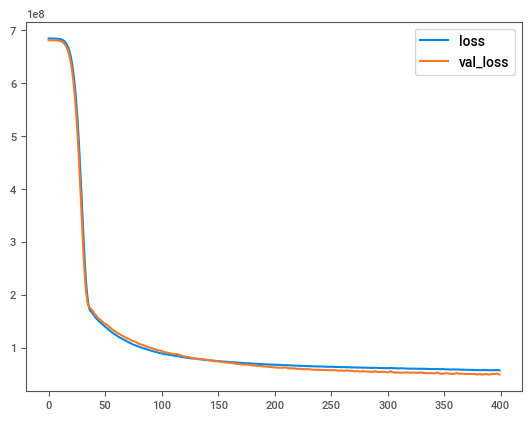

In [33]:
losses = pd.DataFrame(model_NN.history.history)
losses.plot()

In [34]:
predictions = model_NN.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, predictions)}')
print(f'MSE: {mean_squared_error(y_test, predictions)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')
print(f'R^2: {r2_score(y_test, predictions)}')
print(f'Adjusted_R^2: {Adj_R_2(predictions, y_test, X_test)}')

R_2_el.append(r2_score(y_test, predictions))
RMSE.append(np.sqrt(mean_squared_error(y_test, predictions)))
Adjusted_R_2.append(Adj_R_2(predictions, y_test, X_test))
MAE.append(mean_absolute_error(y_test, predictions))
MSE.append(mean_squared_error(y_test, predictions))

7/7 [==============================] - 0s 2ms/step
MAE: 4825.774167682052
MSE: 49275238.27139901
RMSE: 7019.632345885289
R^2: 0.7230498239768742
Adjusted_R^2: 0.6853498000156111


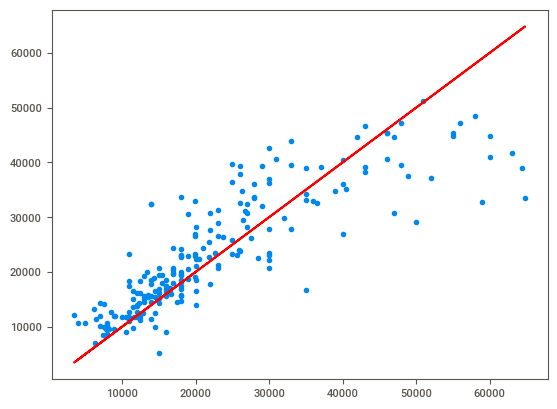

In [35]:
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, 'r')

# Дерево решений

In [36]:
# определение дерева решений
model_DT = DecisionTreeRegressor()
model_DT.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
pred_train = model_DT.predict(X_train)
pred_test = model_DT.predict(X_test)

In [38]:
print('MSE:')
print(f'Точность тренировочной: {mean_squared_error(pred_train, y_train)}')
print(f'Точность тестовой: {mean_squared_error(pred_test, y_test)}')
print('----------------------------------------')

print('MAE:')
print(f'Точность тренировочной: {mean_absolute_error(pred_train, y_train)}')
print(f'Точность тестовой: {mean_absolute_error(pred_test, y_test)}')
print('----------------------------------------')

print('R^2:')
print(f'Точность тренировочной: {r2_score(pred_train, y_train)}')
print(f'Точность тестовой: {r2_score(pred_test, y_test)}')
print('----------------------------------------')

print('RMSE:')
print(f'Точность тренировочной: {np.sqrt(mean_squared_error(pred_train, y_train))}')
print(f'Точность тестовой: {np.sqrt(mean_squared_error(pred_test, y_test))}')
print('----------------------------------------')

print('Adjusted_R^2:')
print(f'Точность тренировочной: {Adj_R_2(pred_train, y_train, X_train)}')
print(f'Точность тестовой: {Adj_R_2(pred_test, y_test, X_test)}')
print('----------------------------------------')

R_2_el.append(r2_score(pred_train, y_train))
RMSE.append(np.sqrt(mean_squared_error(pred_test, y_test)))
Adjusted_R_2.append(Adj_R_2(pred_test, y_test, X_test))
MAE.append(mean_absolute_error(pred_test, y_test))
MSE.append(mean_squared_error(pred_test, y_test))

MSE:
Точность тренировочной: 378293.68098159507
Точность тестовой: 46321231.72133028
----------------------------------------
MAE:
Точность тренировочной: 89.83537832310839
Точность тестовой: 4708.378440366972
----------------------------------------
R^2:
Точность тренировочной: 0.9979785019140626
Точность тестовой: 0.7441867717935444
----------------------------------------
RMSE:
Точность тренировочной: 615.0558356617674
Точность тестовой: 6805.970299768453
----------------------------------------
Adjusted_R^2:
Точность тренировочной: 0.9978986554576579
Точность тестовой: 0.7042127986400912
----------------------------------------


# Cлучайный лес

In [39]:
# определение случайного леса
model_DF = RandomForestRegressor()
model_DF.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
pred_train = model_DF.predict(X_train)
pred_test = model_DF.predict(X_test)

In [41]:
print('MSE:')
print(f'Точность тренировочной: {mean_squared_error(pred_train, y_train)}')
print(f'Точность тестовой: {mean_squared_error(pred_test, y_test)}')
print('----------------------------------------')

print('MAE:')
print(f'Точность тренировочной: {mean_absolute_error(pred_train, y_train)}')
print(f'Точность тестовой: {mean_absolute_error(pred_test, y_test)}')
print('----------------------------------------')

print('R^2:')
print(f'Точность тренировочной: {r2_score(pred_train, y_train)}')
print(f'Точность тестовой: {r2_score(pred_test, y_test)}')
print('----------------------------------------')

print('RMSE:')
print(f'Точность тренировочной: {np.sqrt(mean_squared_error(pred_train, y_train))}')
print(f'Точность тестовой: {np.sqrt(mean_squared_error(pred_test, y_test))}')
print('----------------------------------------')

print('Adjusted_R^2:')
print(f'Точность тренировочной: {Adj_R_2(pred_train, y_train, X_train)}')
print(f'Точность тестовой: {Adj_R_2(pred_test, y_test, X_test)}')
print('----------------------------------------')

R_2_el.append(r2_score(pred_train, y_train))
RMSE.append(np.sqrt(mean_squared_error(pred_test, y_test)))
Adjusted_R_2.append(Adj_R_2(pred_test, y_test, X_test))
MAE.append(mean_absolute_error(pred_test, y_test))
MSE.append(mean_squared_error(pred_test, y_test))

MSE:
Точность тренировочной: 5265280.535574567
Точность тестовой: 26692460.598735776
----------------------------------------
MAE:
Точность тренировочной: 1486.8748431931053
Точность тестовой: 3664.9758675185667
----------------------------------------
R^2:
Точность тренировочной: 0.9680031982458036
Точность тестовой: 0.8174689642597944
----------------------------------------
RMSE:
Точность тренировочной: 2294.6199109165264
Точность тестовой: 5166.474678031024
----------------------------------------
Adjusted_R^2:
Точность тренировочной: 0.9707524363382941
Точность тестовой: 0.8295535778191747
----------------------------------------


# Алгоритм ближ соседей

In [42]:
# определение ближайших соседей
model_KN = KNeighborsRegressor()
model_KN.fit(X_train, y_train)

KNeighborsRegressor()

In [43]:
pred_train = model_KN.predict(X_train)
pred_test = model_KN.predict(X_test)

In [44]:
print('MSE:')
print(f'Точность тренировочной: {mean_squared_error(pred_train, y_train)}')
print(f'Точность тестовой: {mean_squared_error(pred_test, y_test)}')
print('----------------------------------------')

print('MAE:')
print(f'Точность тренировочной: {mean_absolute_error(pred_train, y_train)}')
print(f'Точность тестовой: {mean_absolute_error(pred_test, y_test)}')
print('----------------------------------------')

print('R^2:')
print(f'Точность тренировочной: {r2_score(pred_train, y_train)}')
print(f'Точность тестовой: {r2_score(pred_test, y_test)}')
print('----------------------------------------')

print('RMSE:')
print(f'Точность тренировочной: {np.sqrt(mean_squared_error(pred_train, y_train))}')
print(f'Точность тестовой: {np.sqrt(mean_squared_error(pred_test, y_test))}')
print('----------------------------------------')

print('Adjusted_R^2:')
print(f'Точность тренировочной: {Adj_R_2(pred_train, y_train, X_train)}')
print(f'Точность тестовой: {Adj_R_2(pred_test, y_test, X_test)}')
print('----------------------------------------')

R_2_el.append(r2_score(pred_train, y_train))
RMSE.append(np.sqrt(mean_squared_error(pred_test, y_test)))
Adjusted_R_2.append(Adj_R_2(pred_test, y_test, X_test))
MAE.append(mean_absolute_error(pred_test, y_test))
MSE.append(mean_squared_error(pred_test, y_test))

MSE:
Точность тренировочной: 38961971.92006134
Точность тестовой: 45746552.45669725
----------------------------------------
MAE:
Точность тренировочной: 3967.683742331288
Точность тестовой: 4395.863302752294
----------------------------------------
R^2:
Точность тренировочной: 0.7240494234948242
Точность тестовой: 0.6759705415309301
----------------------------------------
RMSE:
Точность тренировочной: 6241.952572718039
Точность тестовой: 6763.619774698845
----------------------------------------
Adjusted_R^2:
Точность тренировочной: 0.7835741616389982
Точность тестовой: 0.7078824500083447
----------------------------------------


# Градиентный бустинг

In [45]:
# определение градиентного бустинга
model_XGB = XGBRegressor()
model_XGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [46]:
pred_train = model_XGB.predict(X_train)
pred_test = model_XGB.predict(X_test)

In [47]:
print('MSE:')
print(f'Точность тренировочной: {mean_squared_error(pred_train, y_train)}')
print(f'Точность тестовой: {mean_squared_error(pred_test, y_test)}')
print('----------------------------------------')

print('MAE:')
print(f'Точность тренировочной: {mean_absolute_error(pred_train, y_train)}')
print(f'Точность тестовой: {mean_absolute_error(pred_test, y_test)}')
print('----------------------------------------')

print('R^2:')
print(f'Точность тренировочной: {r2_score(pred_train, y_train)}')
print(f'Точность тестовой: {r2_score(pred_test, y_test)}')
print('----------------------------------------')

print('RMSE:')
print(f'Точность тренировочной: {np.sqrt(mean_squared_error(pred_train, y_train))}')
print(f'Точность тестовой: {np.sqrt(mean_squared_error(pred_test, y_test))}')
print('----------------------------------------')

print('Adjusted_R^2:')
print(f'Точность тренировочной: {Adj_R_2(pred_train, y_train, X_train)}')
print(f'Точность тестовой: {Adj_R_2(pred_test, y_test, X_test)}')
print('----------------------------------------')

R_2_el.append(r2_score(pred_train, y_train))
RMSE.append(np.sqrt(mean_squared_error(pred_test, y_test)))
Adjusted_R_2.append(Adj_R_2(pred_test, y_test, X_test))
MAE.append(mean_absolute_error(pred_test, y_test))
MSE.append(mean_squared_error(pred_test, y_test))

MSE:
Точность тренировочной: 586673.7059105901
Точность тестовой: 27224272.83408586
----------------------------------------
MAE:
Точность тренировочной: 387.3947566681844
Точность тестовой: 3715.3598319237385
----------------------------------------
R^2:
Точность тренировочной: 0.996837152388828
Точность тестовой: 0.8253209303285283
----------------------------------------
RMSE:
Точность тренировочной: 765.9462813478436
Точность тестовой: 5217.6884569784215
----------------------------------------
Adjusted_R^2:
Точность тренировочной: 0.9967411467544157
Точность тестовой: 0.8261576566206734
----------------------------------------


In [48]:
d = {'R^2': R_2_el, 'RMSE': RMSE, 'Adjusted R^2': Adjusted_R_2, 'MAE': MAE, 'MSE': MSE}
data = pd.DataFrame(data=d, index=['Линейная регрессия', 'Нейронная сеть', 'Дерево решений', 'Cлучайный лес', 'Алгоритм ближ соседей', 'Градиентный бустинг'])

In [49]:
data

,R^2,RMSE,Adjusted R^2,MAE,MSE
Линейная регрессия,0.535616,7072.428848,0.680599,5010.143154,5.001925e+07
Нейронная сеть,0.723050,7019.632346,0.685350,4825.774168,4.927524e+07
Дерево решений,0.997979,6805.970300,0.704213,4708.378440,4.632123e+07
Cлучайный лес,0.968003,5166.474678,0.829554,3664.975868,2.669246e+07
Алгоритм ближ соседей,0.724049,6763.619775,0.707882,4395.863303,4.574655e+07
Градиентный бустинг,0.996837,5217.688457,0.826158,3715.359832,2.722427e+07


<div class="alert alert-success">

# Вывод:
    
1. В приведенных выше оценках c заметным отрывом побеждает Дерево решений.
    
2. ### «Нужно ли использовать для решения этой задачи машинное обучение или можно обойтись dummy-предсказанием?
    
> Машинное обучение нужно, так как задача требует анализа данных и построения модели, которая может автоматически улучшаться на основе опыта. Однако, в некоторых случаях, можно обойтись dummy-предсказанием, если точность не является критическим фактором.